In [1]:
import numpy as np
import sys
sys.path.append('../../')
sys.path.append('../../pyfos/')
from pyfos.models.feedforward import build_feedforward
from pyfos.models.var_feedforward import build_var_feedforward
from pyfos.generic.optimizer import gd_optimizer
from pyfos.generic.regularizers import gaus_prior
from functools import partial 
from pyfos.tc.simple import  simple_tc
from pyfos.tc.cv import  cv_tc
from pyfos.hyperoptimizers.random_search import random_optimize
from pyfos.hyperoptimizers.greed_optimize import greed_optimize
import theano
%matplotlib inline
import matplotlib.pylab as plt
import random

In [2]:
matrix = np.load('../../../data/matrix.npy')
X, Y = np.load('../../../data/linearx.npy'), np.load('../../../data/lineary.npy')
X_train = X[:100]
Y_train = Y[:100]
X_test = X[100:]
Y_test = Y[100:]
lr = theano.shared(10**(-2))
alphas = theano.shared(np.array([1.0, 1.0]))

optimizer = partial(gd_optimizer, learning_rate=lr)
model_build = partial(build_var_feedforward, structure = [2,1], nonlinearity=lambda x:x, log_alphas=alphas, bias=False, param_pool_size=100)




In [3]:
def choicer():
    a1 = np.random.uniform(low=0.0, high=10.0)
    a2 = np.random.uniform(low=0.0, high=10.0)
    a1 = np.sqrt(10**(a1))
    a2 = np.sqrt(10**(a2))
    return np.log([a1,a2])
print choicer()    

[ 2.29219068  7.25350961]


In [5]:
hyp_lr_range = [10.0, 0.0] 
print 'calbirate: alpha'
found = False
for h in [  [np.array([0.0,0.0]), 10**(-2)], 
             [np.array([np.log(np.sqrt(10**9)), np.log(np.sqrt(10**9))]), 10**(-2)]]:
    
    print h
    while True:

            
            lr.set_value(h[1])
            alphas.set_value(h[0])



            score = greed_optimize(partial(simple_tc,  batch_size=100), model_build, optimizer,10,75 , 10,  X_train, Y_train,  [alphas, lr] , 
                   lr=hyp_lr_range, verbose=100
            ).history[-1][1]
            if lr.eval()>1 or np.isnan(lr.eval()) or np.isnan(np.sum(alphas.eval())) or \
             max(abs(alphas.eval()))>12 or \
            np.isnan(score) or np.isinf(score):
                print 'BAD'
                hyp_lr_range[0] = hyp_lr_range[0]/10
            else:
                
                break
            
print 'final', hyp_lr_range            
        
        
        


calbirate: alpha
[array([ 0.,  0.]), 0.01]


INFO (theano.gof.compilelock): Waiting for existing lock by process '14436' (I am process '14540')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/legin/.theano/compiledir_Linux-3.19--generic-x86_64-with-Ubuntu-14.04-trusty-x86_64-2.7.6-64/lock_dir


iteration 0, internal loss=-1608.83005152, time=0.00085186958313
trial 0 [array([ 0.,  0.]), array(0.01)]
iteration 0, internal loss=-134.702318183 hyperparam loss=-1905.79132795 time = 0.000845909118652
validation -1.32164557843e+21
trial 1 [array([  1.32164558e+21,   1.93216163e+02]), array(0.01)]
iteration 0, internal loss=-1.32164557843e+21 hyperparam loss=-1.32164557843e+21 time = 0.000715017318726
validation -1.32164557843e+21
trial 2 [array([  1.32164558e+21,   9.32161632e+01]), array(0.01)]
iteration 0, internal loss=-1.32164557843e+21 hyperparam loss=-1.32164557843e+21 time = 0.00067400932312
validation -1.32164563162e+21
trial 3 [array([  1.32164558e+21,  -6.38161425e+00]), array(0.01)]
iteration 0, internal loss=-1.32164557843e+21 hyperparam loss=-1.32164557843e+21 time = 0.000679969787598
validation -1.32164557843e+21
trial 4 [array([  1.32164558e+21,   1.02373744e+08]), array(0.01)]
iteration 0, internal loss=-1.32164557843e+21 hyperparam loss=-1.32164557843e+21 time = 0.0

In [7]:
lr_ranges =   [ 10**(-3) , 0.5*10**(-3), 10**(-4), 0.5*10**(-4)]

original, bests = [], []
for _ in xrange(50):
    print 'attemp'
    
    hyp_lr_range = [1.0]
    
    alphas_value = choicer()
    print alphas_value
    lr.set_value(10**(-2))
    alphas.set_value(alphas_value)

    
    bests.append(greed_optimize(partial(simple_tc,   batch_size=100), model_build, optimizer,50, 100, 10,  X_train, Y_train,  [alphas] , 
               lr=hyp_lr_range, verbose=-1, limits=[[-2,12.0]]
    ))
    
    print 'final',  bests[-1].history[-1][-1]
    print lr.eval(), alphas.eval()


attemp
[ 2.06372403  9.78202842]
final -104.209055048
0.01 [ 0.7010361   1.50946246]
attemp
[ 11.40070605   1.60329563]
final -104.209057924
0.01 [ 0.70103236  1.50946922]
attemp
[ 5.23336579  2.6327099 ]
final -104.209050272
0.01 [ 0.70104867  1.50947089]
attemp
[ 11.25968775  10.85923903]
final -104.209060344
0.01 [ 0.70103322  1.50945992]
attemp
[ 8.71574721  7.30569355]
final -104.20904309
0.01 [ 0.70100651  1.50947126]
attemp
[ 9.31620492  6.52790514]
final -104.209048101
0.01 [ 0.7010232   1.50946899]
attemp
[ 10.42352503   1.10263298]
final -104.209048921
0.01 [ 0.7009878   1.50946897]
attemp
[ 0.20172441  1.12907486]
final -104.209050778
0.01 [ 0.7010235   1.50946363]
attemp
[ 8.65643707  2.87733225]
final -104.209048392
0.01 [ 0.70102659  1.50946646]
attemp
[ 8.2544346   1.72088671]
final -104.209047505
0.01 [ 0.70107949  1.50946071]
attemp
[ 4.08393227  5.62641405]
final -104.209050829
0.01 [ 0.70106045  1.50946179]
attemp
[ 2.05157651  3.64375378]
final -104.209051542
0.01 [

In [9]:
bests = bests[:50]

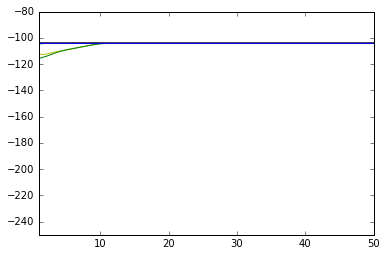

In [8]:
for b in bests:
    history = []
    for i in xrange(0, len(b.history)):
        
        best_value = max([h[1] for h in b.history[:i+1]])
        
        history.append(best_value)
    plt.plot(history)
plt.ylim((-250, -80))
plt.xlim((1,50))
import cPickle
with open('results_var_greed.pckl','wb') as out:
    cPickle.dump(bests, out)

In [5]:
import theano.tensor as T
training_procedure = simple_tc( model_build, optimizer, X_train, Y_train,  batch_size=100 )
X = T.matrix()
result = []
import cPickle
with open('results_var_greed.pckl','rb') as inp:
    bests = cPickle.load(inp)
for b in bests:
    for i in xrange(len(b.history)):
        training_procedure.models[0].respawn()
        
        alphas.set_value(b.history[i][0][0])
        lr.set_value(0.001)
        
    
        for _ in xrange(100):
            training_procedure.do_train()
        print i, training_procedure.do_validation()
        b.history[i] = [b.history[i][0], training_procedure.do_validation()]
    """
    bests.append( random_optimize(partial(cv_tc, k =4,  batch_size=75), model_build, optimizer, 50, 10, X_train, Y_train,  [alphas, lr] ,
     [alpha_ranges, lr_ranges], verbose=100))
    X = T.matrix()    
    model = model_build(dataset_size=100)
    
    
    """
#print np.mean(result)
#print np.std(result)
import cPickle
with open('results_var_greed.pckl','wb') as out:
    cPickle.dump(bests, out)

0 -111.334066211
1 -111.316830947
2 -111.299645138
3 -111.282509373
4 -111.26542447
5 -111.248388208
6 -111.231405167
7 -111.214474507
8 -111.197599921
9 -111.180774552
10 -111.164008851
11 -111.147296755
12 -111.13063704
13 -111.114045238
14 -111.097499938
15 -111.081018382
16 -111.064596693
17 -111.048235295
18 -111.031936684
19 -111.015701159
20 -110.999524272
21 -110.983411114
22 -110.967368131
23 -110.951384486
24 -110.935467187
25 -110.919625576
26 -110.903847736
27 -110.888136118
28 -110.872501193
29 -110.856923948
30 -110.841432152
31 -110.826007245
32 -110.81065385
33 -110.795376941
34 -110.78017207
35 -110.765045959
36 -110.749988514
37 -110.735018347
38 -110.720121515
39 -110.70530627
40 -110.690566702
41 -110.675916533
42 -110.661340417
43 -110.6468535
44 -110.632445712
45 -110.618124357
46 -110.603882284
47 -110.589730488
48 -110.575661924
49 -110.561687803
50 -110.547799083
0 -118.171892338
1 -118.15189748
2 -118.131897462
3 -118.111901431
4 -118.091901785
5 -118.07190758

In [ ]:
best_values = []
for b in bests:
    history = []
    for i in xrange(0, len(b.history)):
        
        best_value = max([h[1] for h in b.history[:i+1]])
        
        history.append(best_value)
        if np.isnan(history[-1]):
            continue
        best_values.append(history[-1])
print np.mean(best_values)

In [ ]:
import theano.tensor as T
X = T.matrix()
result = []
alphas.set_value(np.array([10, 10]))
lr.set_value(10**(-3))
training_procedure = cv_tc( model_build, optimizer, X_train, Y_train, validation_part=0.0, batch_size=100 )
    
for i in xrange(10):
    training_procedure.do_train()


In [ ]:
#training_procedure.models[0].params.eval()
X = T.matrix()
predict = training_procedure.models[0].predict_var(X)
predict = theano.function([X], predict)
print np.mean(predict(X_test) - np.dot(X_test, [0.3, 0.38]))
pred1 = predict(X_test)
pred2 = np.dot(X_test, [0.3, 0.38])
#print np.mean(pred1 - pred2)
print np.mean((pred1[:,0] - Y_test)**2)
print np.mean((pred2 - Y_test)**2)
print pred1.shape
print pred2.shape

#print np.mean((predict(X_test)-Y_test)**2)
#print np.mean(( - Y_test)**2)

In [ ]:
plt.matshow(matrix)
for i in bests:
    i = i.best_values[0]**2
    i = np.log10(i)
    if i[0]>10 or i[1] >10:
        continue
    if i[0]<0 or i[1]<0:
        continue
    
    plt.scatter(i[0]+np.random.randn(1)*0.1,i[1]+np.random.randn(1)*0.1, c='w')

In [ ]:
for i in bests:
    print np.array(i.best_values[0])**2

In [ ]:
plt.matshow(matrix)
for i in bests:
    i = i.best_values[0]**2
    i = np.log10(i)
    
    plt.scatter(i[0],i[1], c='w')